In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors as c
import pandas as pd

<h1>TITANIC</h1>

In [2]:
train = pd.read_csv('titanic-train.csv')
test = pd.read_csv('titanic-test.csv')

In [3]:
sex = np.array(train['Sex'])
sex[sex == 'male'] = 0
sex[sex == 'female'] = 1
parch = np.array(train['Parch'])
sibsp = np.array(train['SibSp'])

In [4]:
data = np.array([sex, parch, sibsp]).T
labels = np.array(train['Survived'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=321)

In [6]:
# red, orange, blue, violet
colors = ['#ff0000', '#ff8400', '#0004ff', '#9b00fc']
colors_smooth=['#e38a8a', '#fabb78', '#7c7ef7','#d6aaf2']

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=24))
classifier.fit(X_train, y_train)

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=24))])

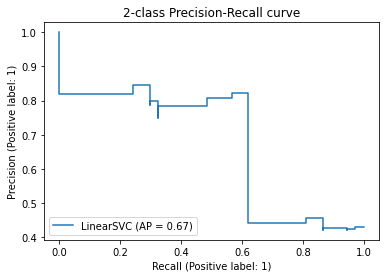

In [8]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [9]:
(classifier.predict(X_test) == y_test).mean()

0.7444444444444445

In [10]:
classifier = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis())
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('quadraticdiscriminantanalysis',
                 QuadraticDiscriminantAnalysis())])

In [11]:
(classifier.predict(X_test) == y_test).mean()

0.7666666666666667

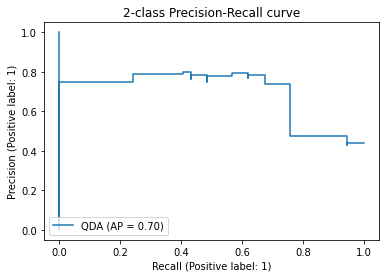

In [12]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="QDA"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [13]:
from sklearn import svm, datasets
classifier = svm.SVC(kernel="rbf", probability=True, random_state=241)
classifier.fit(X_train, y_train)

SVC(probability=True, random_state=241)

In [14]:
(classifier.predict(X_test) == y_test).mean()

0.7777777777777778

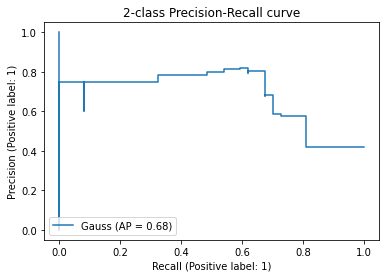

In [15]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="Gauss"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

<h1>FLAME</h1>

In [16]:
with open('flame.txt') as f:
    lines = f.readlines()
data = list()
for line in lines:
    arr = line.replace('\t', ' ').replace('\n', '').split()
    arr = list(map(float, arr))
    data.append(arr)
data = np.array(data)

In [17]:
data[:, 1] /= data[:, 1].mean()
data[:, 0] /= data[:, 0].mean()
data[:, 2] -= 1

In [18]:
# red, orange, blue, violet
colors = ['#ff0000', '#ff8400', '#0004ff', '#9b00fc']
colors_smooth=['#e38a8a', '#fabb78', '#7c7ef7','#d6aaf2']

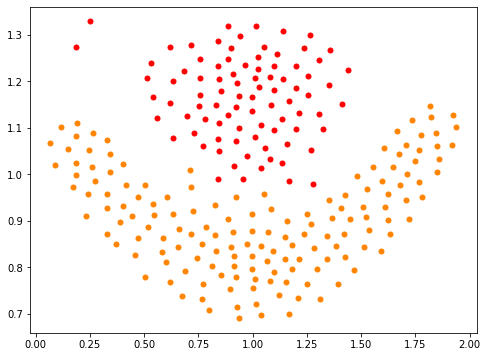

In [19]:
plt.figure(figsize=(8, 6))
for i, x in enumerate(data):
    color = colors[int(x[2])]
    plt.plot(x[0], x[1], marker="o", 
             markersize=5, markeredgecolor=color, 
             markerfacecolor=color)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2], test_size=0.25, random_state=3213)

<h1>LDA</h1>

In [21]:
clf = LinearDiscriminantAnalysis(solver='svd')
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [22]:
nsx = 200
nsy = 200
# Data to be plotted
x = np.outer(np.linspace(0, 2, nsx), np.ones(nsy))
y_y = np.outer(np.linspace(0.6, 1.4, nsy), np.ones(nsx)).T

z = np.zeros((nsx, nsy))

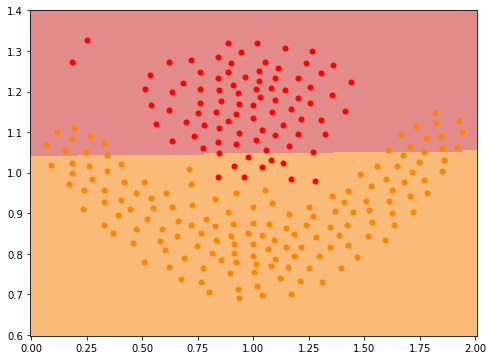

In [23]:
plt.figure(figsize=(8, 6))
Z = list()

for i in range(len(x)):
    preds = clf.predict(np.array([x[i], y_y[i]]).T)
    Z.append(preds)
cMap = c.ListedColormap(colors_smooth[:2])
plt.pcolormesh( x, y_y, Z, shading = 'nearest', cmap=cMap)
for i, x_ in enumerate(data):
    color = colors[int(x_[2])]
    plt.plot(x_[0], x_[1], marker="o", 
             markersize=5, markeredgecolor=color, 
             markerfacecolor=color)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

Xt = data[:, :2]
y = data[:, 2]

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
y = y[:, :2]
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=3213)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    LinearDiscriminantAnalysis(solver='svd')
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

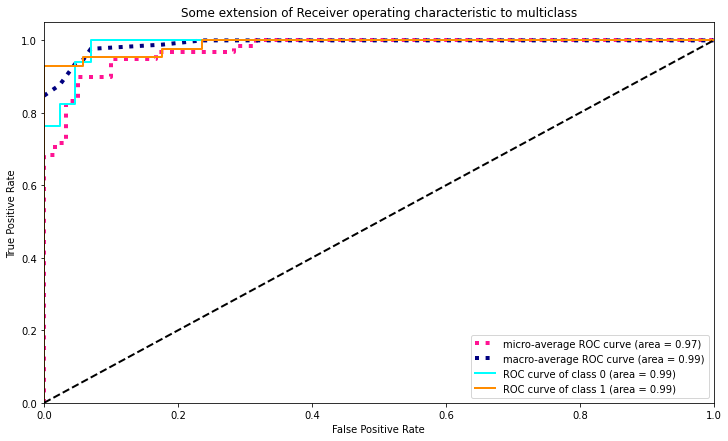

In [25]:
# First aggregate all false positive rates
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

<h1>QDA</h1>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2], test_size=0.25, random_state=3213)

In [27]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [28]:
nsx = 200
nsy = 200
# Data to be plotted
x = np.outer(np.linspace(0, 2, nsx), np.ones(nsy))
y_y = np.outer(np.linspace(0.6, 1.4, nsy), np.ones(nsx)).T

z = np.zeros((nsx, nsy))

In [29]:
# red, orange, blue, violet
colors = ['#ff0000', '#ff8400', '#0004ff', '#9b00fc']
colors_smooth=['#e38a8a', '#fabb78', '#7c7ef7','#d6aaf2']

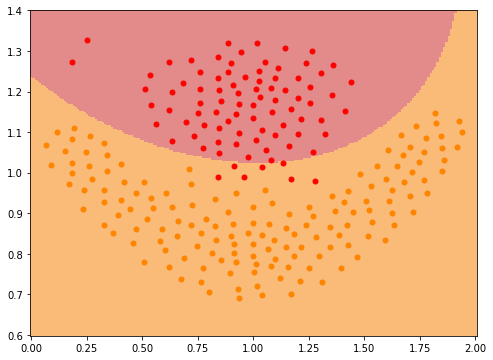

In [30]:
plt.figure(figsize=(8, 6))
Z = list()

for i in range(len(x)):
    preds = clf.predict(np.array([x[i], y_y[i]]).T)
    Z.append(preds)
cMap = c.ListedColormap(colors_smooth[:2])
plt.pcolormesh( x, y_y, Z, shading = 'nearest', cmap=cMap)
for i, x_ in enumerate(data):
    color = colors[int(x_[2])]
    plt.plot(x_[0], x_[1], marker="o", 
             markersize=5, markeredgecolor=color, 
             markerfacecolor=color)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

Xt = data[:, :2]
y = data[:, 2]

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
y = y[:, :2]
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=3213)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    QuadraticDiscriminantAnalysis()
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

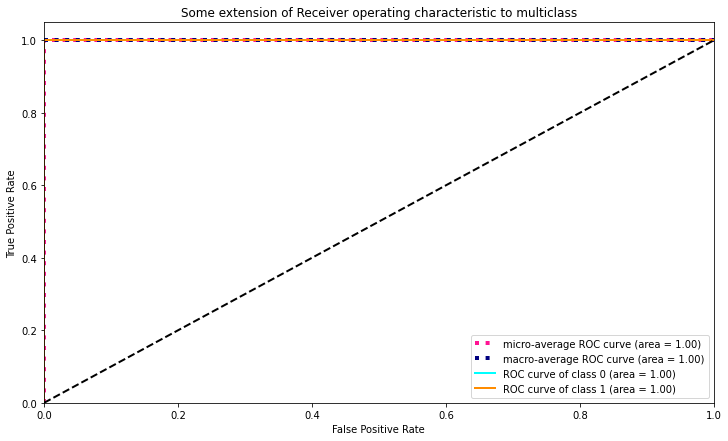

In [32]:
# First aggregate all false positive rates
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

<h1>SVM</h1>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2], test_size=0.25, random_state=3213)

In [34]:
clf = svm.SVC(kernel="rbf", probability=True, random_state=5)
clf.fit(X_train, y_train)

SVC(probability=True, random_state=5)

In [35]:
nsx = 200
nsy = 200
# Data to be plotted
x = np.outer(np.linspace(0, 2, nsx), np.ones(nsy))
y_y = np.outer(np.linspace(0.6, 1.4, nsy), np.ones(nsx)).T

z = np.zeros((nsx, nsy))

In [36]:
# red, orange, blue, violet
colors = ['#ff0000', '#ff8400', '#0004ff', '#9b00fc']
colors_smooth=['#e38a8a', '#fabb78', '#7c7ef7','#d6aaf2']

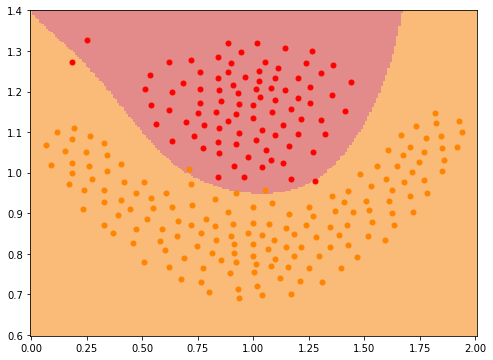

In [37]:
plt.figure(figsize=(8, 6))
Z = list()

for i in range(len(x)):
    preds = clf.predict(np.array([x[i], y_y[i]]).T)
    Z.append(preds)
cMap = c.ListedColormap(colors_smooth[:2])
plt.pcolormesh( x, y_y, Z, shading = 'nearest', cmap=cMap)
for i, x_ in enumerate(data):
    color = colors[int(x_[2])]
    plt.plot(x_[0], x_[1], marker="o", 
             markersize=5, markeredgecolor=color, 
             markerfacecolor=color)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

Xt = data[:, :2]
y = data[:, 2]

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
y = y[:, :2]
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=3213)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=5)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

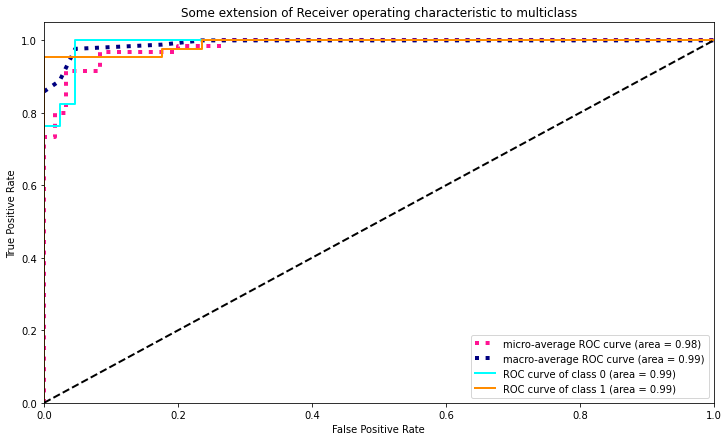

In [39]:
# First aggregate all false positive rates
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()